In [13]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [80]:
X = np.load("F:\\Dataset\\chess\\X.npy")
Y = np.load("F:\\Dataset\\chess\\Y.npy")

print(X.shape, Y.shape)
Y = Y.reshape((-1,1))

(3331358, 768) (3331358, 1)


(2138288, 1)


(array([1028511.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1109777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

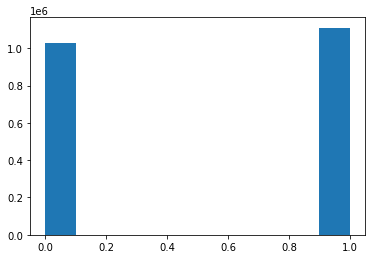

In [69]:
#Y = (np.argmax(Y, axis=1) == 1) * 1.0
print(Y.shape)
plt.hist(Y)

In [56]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation="sigmoid",  kernel_initializer=keras.initializers.Zeros(), input_shape=(len(X[0]),)))
opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 769       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [57]:
split = int(len(X)*0.75)
X_, Y_ = shuffle(X[0:split], Y[0:split], random_state=0)

hist = model.fit(X_, Y_, batch_size=128, epochs=20, validation_data=(X[split:len(X)], Y[split:len(Y)]),)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8407/8429 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.5843WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E5C5F5F948> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

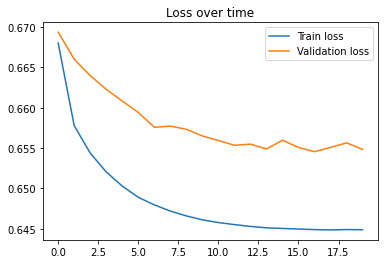

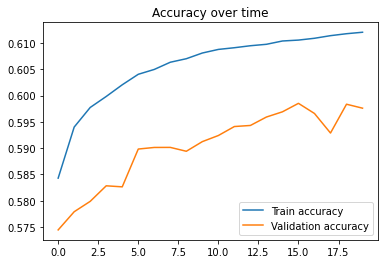

In [58]:
plt.title("Loss over time")
plt.plot(hist.history["loss"], label="Train loss")
plt.plot(hist.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

plt.title("Accuracy over time")
plt.plot(hist.history["accuracy"], label="Train accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.show()

In [59]:
model.save("./reg-log.h5")

pions


[Text(0.5, 1.0, 'Valeurs des pions en fonction de leur position')]

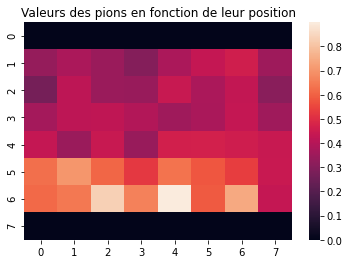

In [89]:
import seaborn as sns
import pandas as pd

print("pions")
#mat = model.get_weights()[0].reshape(8,8,12)[:,:,0]

mat = mod.coef_.reshape(8,8,12)[:,:,0]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des pions en fonction de leur position')

[Text(0.5, 1.0, 'Valeurs des cavaliers en fonction de leur position')]

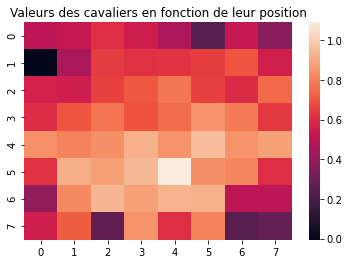

In [90]:
mat = mod.coef_.reshape(8,8,12)[:,:,1]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des cavaliers en fonction de leur position')

[Text(0.5, 1.0, 'Valeurs des fous en fonction de leur position')]

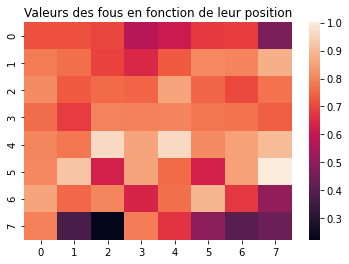

In [91]:
mat = mod.coef_.reshape(8,8,12)[:,:,2]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des fous en fonction de leur position')

[Text(0.5, 1.0, 'Valeurs des tours en fonction de leur position')]

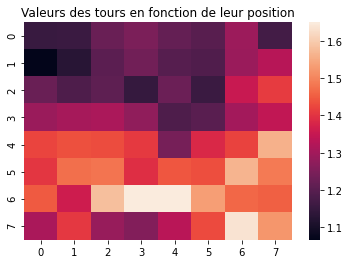

In [92]:
mat = mod.coef_.reshape(8,8,12)[:,:,3]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des tours en fonction de leur position')

[Text(0.5, 1.0, 'Valeurs des reines en fonction de leur position')]

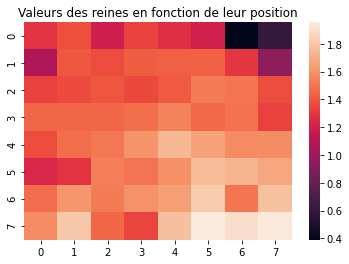

In [93]:
mat = mod.coef_.reshape(8,8,12)[:,:,4]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des reines en fonction de leur position')

[Text(0.5, 1.0, 'Valeurs des rois en fonction de leur position')]

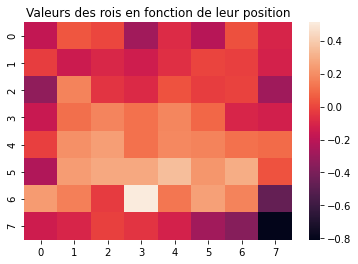

In [94]:
mat = mod.coef_.reshape(8,8,12)[:,:,5]
sns.heatmap(pd.DataFrame(mat)).set(title='Valeurs des rois en fonction de leur position')

In [65]:
weights = []
for i in range(64):
    weights.append([1.0, 3.0, 3.0, 5.0, 9.0, 0.0, -1.0, -3.0, -3.0, -5.0, -9.0, -0.0])
weights = np.array(weights).reshape((8,8,-1))

weights = np.array(weights).reshape((-1))

preds = X @ weights
out = 1.0 / (1.0 + np.exp(-preds))
acc = 0
for i in range(len(preds)):
    pred = 1 if out[i] >= 0.5 else 0
    if pred == Y[i]:
        acc += 1

print(acc, acc / len(preds))

good = 0
preds = model.predict(X)
for i in range(len(preds)):
    if (preds[i][0] > 0.5 and Y[i][0]) == 1.0 or (preds[i][0] < 0.5 and Y[i][0] == 0.0):
        good += 1

print(good, good/len(preds))

569578 0.6004786303160647
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
568821 0.5996805617053577


In [82]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression().fit(X[0:split], Y[0:split])
print(mod.score(X, Y))

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Utilisateur\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6074096509591584


In [83]:
from joblib import dump, load

dump(mod, "./reg-log")

['./reg-log']